In [1]:
import sys
sys.path.append('../simulations/')
from grid_manager import *
from habitat_analysis import *
from hdf5_reader import *
from time import time

from collections import OrderedDict as odict

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


In [2]:
FPATH0 = '../data/alternative_scenarios/affinity_snohettaV2.h5'
# FPATH0 = '../data/affinity_snohetta_small.h5'
data0 = HDF5Reader(FPATH0)
g0 = data0.make_grid()

FPATH1 = '../data/alternative_scenarios/affinity_snohetta_scenario1V2.h5'
# FPATH1 = '../data/affinity_snohetta_small.h5'
data1 = HDF5Reader(FPATH1)
g1 = data1.make_grid()

In [3]:
inf = np.inf
betas_files = [0, 0.0001, 0.001, 0.01, 0.1, inf]
betas_other = [1e-7,1e-6,1e-5]

betas_all = [0., 1e-7,1e-6,1e-5, 0.0001, 0.001, 0.01, 0.1, inf]
betas_KL = [1e-7,1e-6,1e-5, 0.0001, 0.001, 0.01, 0.1]

In [4]:
HFs = odict()
HFs[g0] = odict()
HFs[g1] = odict()

LFs = odict()
LFs[g0] = odict()
LFs[g1] = odict()

mean_D_KLs = odict()
mean_D_KLs[g0] = odict()
mean_D_KLs[g1] = odict()

In [5]:
for G in [g0, g1]:
    for j in range(len(betas_all)):
        print "Beta " + str(j+1) + "/" + str(len(betas_all))
        beta = betas_all[j]
        tic = time()
        RSP = HabitatAnalysis(G,\
                        beta = beta, \
                        similarity_measure='RSP_dissimilarity', \
                        affinity_to_cost='paper_choice', \
                        distance_to_similarity='paper_choice', \
                        verbose=True)

        RSP.compute_similarities()
        if beta != 0 and beta != np.inf:
            # D_KL = RSP.compute_KL_divergences_to()
            # mean_D_KLs[G][beta] = np.mean(D_KL[D_KL>0])
            # del D_KL
            mean_D_KLs[G][beta] = RSP.mean_D_KL


        HF = RSP.compute_habitat_functionalities_from_similarities()
        HFs[G][beta] = HF

        LF = np.dot(HF,RSP.G.qualities)
        print LF
        del RSP
        LFs[G][beta] = LF
        print LFs
        print mean_D_KLs
        toc = str(time()-tic)
        print "Time elapsed: " + toc + " seconds"

    

Beta 1/9
Compute distances from all nodes to landmarks...
Computing inverse of L - 1/N_i*e*eT ...
Random walk expected costs computed in 109.289466858 seconds
Computing distance to similarity transformation
181.94161192885525
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict())])
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict()), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict())])
Time elapsed: 114.548903942 seconds
Beta 2/9
Compute distances from all nodes to landmarks...
Computing Z...
Computing (C*W)Z...
Computing Z(C*W)Z...
Computing Z(C*W)Z/Z...
Computing D - e*diag(D).T
Computing mean KL-divergence
RSP expected costs computed in 291.072688103 seconds
Computing distance to similarity transformation
184.10907182502953
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525), (1e-07, 184.109071825

/anaconda3/envs/py2env/lib/python2.7/site-packages/scipy/sparse/data.py:123: RuntimeWarning: invalid value encountered in multiply
  return self._with_data(self.data * other)


Computing distance to similarity transformation
160274.05201107377
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525), (1e-07, 184.10907182502953), (1e-06, 203.04242143334048), (1e-05, 365.87411230220675), (0.0001, 1502.1229187825681), (0.001, 7244.41644825525), (0.01, 26691.52778425374), (0.1, 70144.49373524754), (inf, 160274.05201107377)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict())])
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(1e-07, 253.7887567145509), (1e-06, 2944.5450519955475), (1e-05, 38995.976844290635), (0.0001, 222629.41824020565), (0.001, 638736.9129659657), (0.01, 1527069.4636181984), (0.1, 3662893.466982143)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict())])
Time elapsed: 121.24327302 seconds
Beta 1/9
Compute distances from all nodes to landmarks...
Computing inverse of L - 1/N_i*e*eT ...
Random walk expected costs computed in 103.7300632 seconds


../simulations/habitat_analysis.py:331: RuntimeWarning: Some distances were negative and were set to zero. 				           This can happen sometimes at least with RSP_dissimilarity 				           due to numerical inaccuracies (maybe caused by 0-costs?) 				           and usually the negative values are practically 0
  and usually the negative values are practically 0', RuntimeWarning)


Computing distance to similarity transformation
189.98071473723328
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525), (1e-07, 184.10907182502953), (1e-06, 203.04242143334048), (1e-05, 365.87411230220675), (0.0001, 1502.1229187825681), (0.001, 7244.41644825525), (0.01, 26691.52778425374), (0.1, 70144.49373524754), (inf, 160274.05201107377)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict([(0.0, 189.98071473723328)]))])
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(1e-07, 253.7887567145509), (1e-06, 2944.5450519955475), (1e-05, 38995.976844290635), (0.0001, 222629.41824020565), (0.001, 638736.9129659657), (0.01, 1527069.4636181984), (0.1, 3662893.466982143)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict())])
Time elapsed: 109.164611816 seconds
Beta 2/9
Compute distances from all nodes to landmarks...
Computing Z...
Computing (C*W)Z...
Computing Z(C*W)Z...
Computing Z(C*W)Z/Z...
Comput

Computing (C*W)Z...
Computing Z(C*W)Z...
Computing Z(C*W)Z/Z...
Computing D - e*diag(D).T
Computing mean KL-divergence
RSP expected costs computed in 292.252058983 seconds
Computing distance to similarity transformation
72509.02711956494
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525), (1e-07, 184.10907182502953), (1e-06, 203.04242143334048), (1e-05, 365.87411230220675), (0.0001, 1502.1229187825681), (0.001, 7244.41644825525), (0.01, 26691.52778425374), (0.1, 70144.49373524754), (inf, 160274.05201107377)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict([(0.0, 189.98071473723328), (1e-07, 192.08916939836465), (1e-06, 210.4824012773787), (1e-05, 368.85710760488985), (0.0001, 1517.566679565953), (0.001, 7457.444348970163), (0.01, 27491.538155422495), (0.1, 72509.02711956494)]))])
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(1e-07, 253.7887567145509), (1e-06, 2944.5450519955475), (1e-05, 38995.9768

In [6]:
LFs

OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>,
              OrderedDict([(0.0, 181.94161192885525),
                           (1e-07, 184.10907182502953),
                           (1e-06, 203.04242143334048),
                           (1e-05, 365.87411230220675),
                           (0.0001, 1502.1229187825681),
                           (0.001, 7244.41644825525),
                           (0.01, 26691.52778425374),
                           (0.1, 70144.49373524754),
                           (inf, 160274.05201107377)])),
             (<grid_manager.Grid instance at 0x108bf9fc8>,
              OrderedDict([(0.0, 189.98071473723328),
                           (1e-07, 192.08916939836465),
                           (1e-06, 210.4824012773787),
                           (1e-05, 368.85710760488985),
                           (0.0001, 1517.566679565953),
                           (0.001, 7457.444348970163),
                           (0.01, 27491.538155422495

/anaconda3/envs/py2env/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


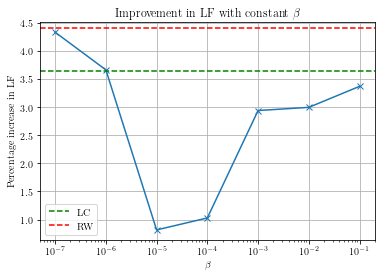

In [7]:
LF0_vals = np.array([LFs[g0][b] for b in betas_all])
LF1_vals = np.array([LFs[g1][b] for b in betas_all])
improvements = 100*(LF1_vals-LF0_vals)/LF0_vals
plt.semilogx(betas_all[1:-1], improvements[1:-1], '-x')
plt.axhline(improvements[-1], color='g', linestyle='--', label='LC')
plt.axhline(improvements[ 0], color='r', linestyle='--', label='RW')
#plt.ylim(0,5)
plt.xlabel(r'$\beta$')
plt.ylabel('Percentage increase in LF')
plt.legend()
plt.grid('on')
_ = plt.title(r'Improvement in LF with constant $\beta$')

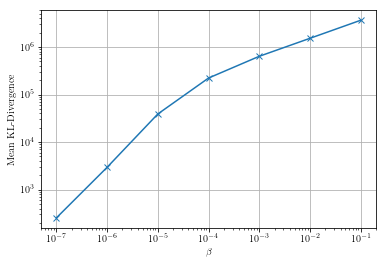

In [8]:


plt.loglog(betas_KL, [mean_D_KLs[g0][b] for b in betas_KL], '-x')
#plt.axhline(mean_D_KLs[0], '--', label="KL-D with LC")
plt.xlabel(r"$\beta$")
plt.ylabel("Mean KL-Divergence")
plt.grid('on')

In [9]:
# DEFINE LANDMARKS FOR D_KL ESTIMATION (USED FOR BOTH LANDSCAPES):
# n_landmarks = 2000
# LM = Landmarks(g0, n_landmarks=n_landmarks, sampling_method='spread_and_quality') 
# LM = Landmarks(g0, n_landmarks=n_landmarks, sampling_method='qualities') 
# LM = np.array(LM.landmarks)

# ALTERNATIVELY USE ALL D_KLs:
LM = np.arange(g1.N)

In [12]:
G = g1

new_betas = odict()
new_mean_D_KLs = np.zeros((len(betas_KL)))

for j in range(len(betas_KL)):
    tic = time()
    old_beta = betas_KL[j]
    old_mean_D_KL = mean_D_KLs[g0][old_beta]
    new_beta = find_beta_with_D_KL(D_KL=old_mean_D_KL, G=G, lmarks=LM, init_beta=1.05*old_beta)
    print str(old_beta) + " --> " + str(new_beta)
    print time()-tic
    new_betas[old_beta] = new_beta    
    

Computing with 1.05e-07
Computing with 1.05e-07
Computing with 1.05e-07
Computing with 1.0500000156462192e-07
Computing with 1.0064557739729507e-07
Computing with 1.0068588758134237e-07
Computing with 1.0068586699586914e-07
1e-07 --> 1.0068586699586914e-07
2055.19966292
Computing with 1.05e-06
Computing with 1.05e-06
Computing with 1.05e-06
Computing with 1.050000015646219e-06
Computing with 1.02773777896917e-06
Computing with 1.027695544659272e-06
1e-06 --> 1.027695544659272e-06
1786.42122698
Computing with 1.0500000000000001e-05
Computing with 1.0500000000000001e-05
Computing with 1.0500000000000001e-05
Computing with 1.0500000156462194e-05
Computing with 1.0525788324731402e-05
Computing with 1.0525794650742195e-05
1e-05 --> 1.0525794650742195e-05
1826.72811985
Computing with 0.000105
Computing with 0.000105
Computing with 0.000105
Computing with 0.00010500000156462193
Computing with 0.00010657852483726224
Computing with 0.00010658655509899479
Computing with 0.00010658659603958909
0.

In [14]:
LF1s_KL = odict()
for j in range(len(betas_KL)):
    new_beta = new_betas[betas_KL[j]]
    print "New beta " + str(j+1) + "/" + str(len(new_betas)) + " = " + str(new_beta)
    RSP = HabitatAnalysis(G, \
                    beta = new_beta, \
                    similarity_measure='RSP_dissimilarity', \
                    affinity_to_cost='paper_choice', \
                    distance_to_similarity='paper_choice', \
                    verbose=True)
    RSP.compute_similarities()
    
    HF = RSP.compute_habitat_functionalities_from_similarities()
    
    HFs[G][new_beta] = HF
    
    LF = np.dot(HF,RSP.G.qualities)
    print "LF = " + str(LF)
    del RSP
    LFs[G][new_beta] = LF
    print LFs

New beta 1/7 = 1.0068586699586914e-07
Compute distances from all nodes to landmarks...
Computing Z...
Computing (C*W)Z...
Computing Z(C*W)Z...
Computing Z(C*W)Z/Z...
Computing D - e*diag(D).T
Computing mean KL-divergence
RSP expected costs computed in 294.494592905 seconds
Computing distance to similarity transformation
192.1035795072282
OrderedDict([(<grid_manager.Grid instance at 0x1a1a4c7320>, OrderedDict([(0.0, 181.94161192885525), (1e-07, 184.10907182502953), (1e-06, 203.04242143334048), (1e-05, 365.87411230220675), (0.0001, 1502.1229187825681), (0.001, 7244.41644825525), (0.01, 26691.52778425374), (0.1, 70144.49373524754), (inf, 160274.05201107377)])), (<grid_manager.Grid instance at 0x108bf9fc8>, OrderedDict([(0.0, 189.98071473723328), (1e-07, 192.08916939836465), (1e-06, 210.4824012773787), (1e-05, 368.85710760488985), (0.0001, 1517.566679565953), (0.001, 7457.444348970163), (0.01, 27491.538155422495), (0.1, 72509.02711956494), (inf, 166107.06374426576), (1.0068586699586914e-07

In [15]:
LF0s_KL = [LFs[g0][b] for b in betas_KL]
LF1s_KL = [LFs[g1][new_betas[b]] for b in betas_KL]

In [16]:
LF1s_KL

[192.1035795072282,
 211.0340970170684,
 377.34835969223104,
 1588.7886318527064,
 7905.988543781548,
 28659.463764577198,
 74867.74437992554]

In [17]:
ratios = np.array([100*(LF1-LF0)/LF0 for LF1,LF0 in zip(LF1s_KL,LF0s_KL)])

ratio_RW = 100.*(LFs[g1][0]-LFs[g0][0])/LFs[g0][0]
ratio_LC = 100.*(LFs[g1][inf]-LFs[g0][inf])/LFs[g0][inf]

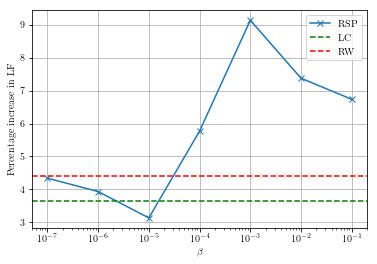

In [21]:

plt.semilogx(betas_KL, ratios, '-x', label='RSP')
plt.axhline(ratio_LC, color='g', linestyle='--', label='LC')
plt.axhline(ratio_RW, color='r', linestyle='--', label='RW')

plt.grid('on')
plt.xlabel(r'$\beta$')
# plt.ylim(0,12)
plt.ylabel('Percentage increase in LF')
plt.legend()
# plt.title('Improvement in LF with constant KL-divergence')
plt.grid('on')

plt.savefig('constant_full_meanDKL.pdf')